# Nonlinear Ordinary Differential Equations

In [1]:
import sys

sys.path.append('..')

### Example #1

$y'(x) = y(x)(1 - y(x)), y(0) = 0.5$

##### Finding $y = y(x)$ using Euler's method

In [2]:
import numpy as np
from modules.ode.linear.initial_value import euler

def f(x: float, y: np.ndarray[float]) -> np.ndarray[float]:
    fx = np.zeros(len(y))
    
    fx[0] = y[0]*(1 - y[0])

    return fx

a = 0.
b = 2.

ya = np.array([0.5])

N = [5, 25, 125]

re = [euler(f, a, b, ya, n) for n in N]

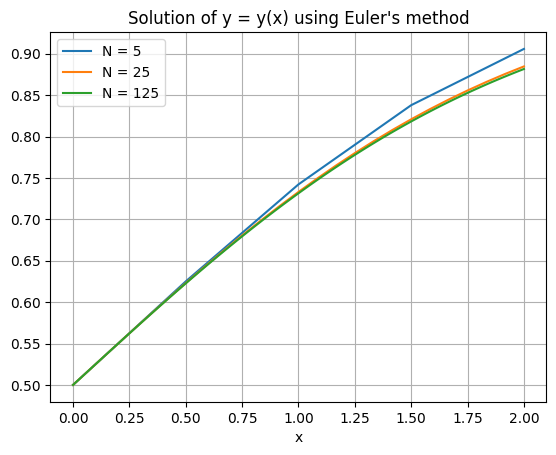

In [3]:
import matplotlib.pyplot as plt

for i in range(len(N)):
    plt.plot(re[i][0], re[i][1][:, 0], label=f'N = {N[i]}')

plt.title("Solution of y = y(x) using Euler's method")
plt.xlabel('x')
plt.grid()
plt.legend()

##### Finding $y = y(x)$ using modified Euler's method

In [4]:
from modules.ode.linear.initial_value import modified_euler

rme = [modified_euler(f, a, b, ya, n) for n in N]

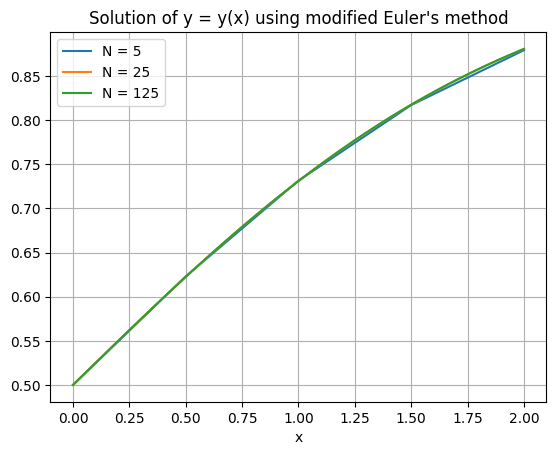

In [5]:
for i in range(len(N)):
    plt.plot(rme[i][0], rme[i][1][:, 0], label=f'N = {N[i]}')

plt.title("Solution of y = y(x) using modified Euler's method")
plt.xlabel('x')
plt.grid()
plt.legend()

##### Finding $y = y(x)$ using Cranck-Nicolson method

$\frac{y(x+h) - y(x)}{h} = y(x + h/2) - y^2(x + h/2)$

$y(x + h/2) = \frac{1}{2}[y(x + h) + y(x)]$

$y^2(x + h/2) = y(x + h)y(x)$

$\frac{y(x+h) - y(x)}{h} = \frac{1}{2}[y(x + h) + y(x)] - y(x + h)y(x)$

$\frac{y_{i+1} - y_i}{h} = \frac{1}{2}[y_{i+1} + y_i] - y_{i+1}y_i$

$y_{i+1} = \frac{1 + h/2}{1 + hy_i - h/2}y_i$

In [6]:
x = [np.linspace(a, b, n) for n in N]
ycn = [np.zeros(n) for n in N]

for i in range(len(N)):
    h = x[i][1] - x[i][0]

    ycn[i][0] = 0.5

    for j in range(1, N[i]):
        ycn[i][j] = (1 + h/2)*ycn[i][j-1]/(1 + h*ycn[i][j-1] - h/2)

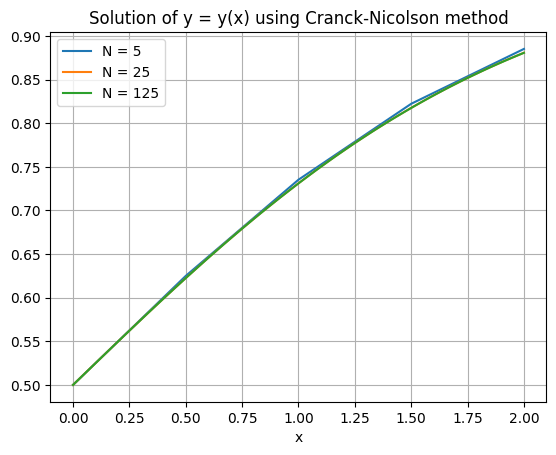

In [7]:
for i in range(len(N)):
    plt.plot(x[i], ycn[i], label=f'N = {N[i]}')

plt.title("Solution of y = y(x) using Cranck-Nicolson method")
plt.xlabel('x')
plt.grid()
plt.legend()

##### Finding $y = y(x)$ using one step Picard method

$\frac{y(x+h) - y(x)}{h} = y(x+h)[1 - y(x)]$

$\frac{y_{i+1} - y_i}{h} = y_{i+1}[1 - y_i]$

$y_{i+1} = \frac{y_i}{1 - h + y_ih}$

In [8]:
yp1 = [np.zeros(n) for n in N]

for i in range(len(N)):
    h = x[i][1] - x[i][0]

    yp1[i][0] = 0.5

    for j in range(1, N[i]):
        yp1[i][j] = yp1[i][j-1]/(1 - h + yp1[i][j-1]*h)

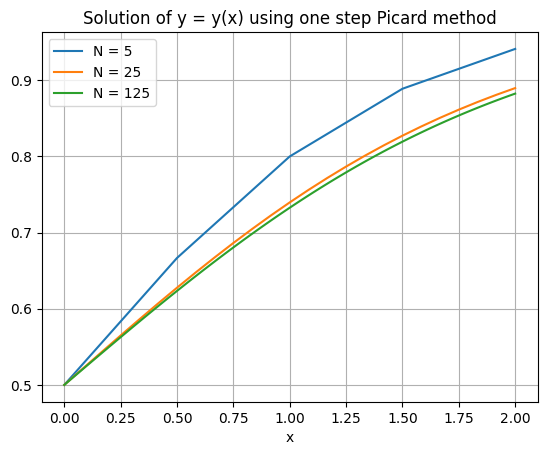

In [9]:
for i in range(len(N)):
    plt.plot(x[i], yp1[i], label=f'N = {N[i]}')

plt.title("Solution of y = y(x) using one step Picard method")
plt.xlabel('x')
plt.grid()
plt.legend()

##### Finding $y = y(x)$ using Picard method

$\frac{y(x+h) - y(x)}{h} = y(x+h)[1 - y(x+h)]$

$\frac{y_{i+1} - y_i}{h} = y_{i+1}[1 - y_{i+1}]$

$y_{i+1} = y_i + hy_{i+1}[1 - y_{i+1}]$

$y_{i+1}^{k+1} = y_i + hy_{i+1}^{k+1}[1 - y_{i+1}^k]$

$y_{i+1}^{k+1} = \frac{y_i}{1 - h + y_{i+1}^kh}, y_{i+1}^0 = y_i$

$|y_{i+1}^{k+1} - y_i - hy_{i+1}^{k+1}[1 - y_{i+1}^{k+1}]| < \epsilon$

In [10]:
tol = 1e-9
yp = [np.zeros(n) for n in N]

for i in range(len(N)):
    h = x[i][1] - x[i][0]

    yp[i][0] = 0.5

    for j in range(1, N[i]):
        yt = yp[i][j-1]
        
        while abs(yt - yp[i][j-1] - h*yt*(1 - yt)) >= tol:
            yt = yp[i][j-1]/(1 - h + yt*h)

        yp[i][j] = yt

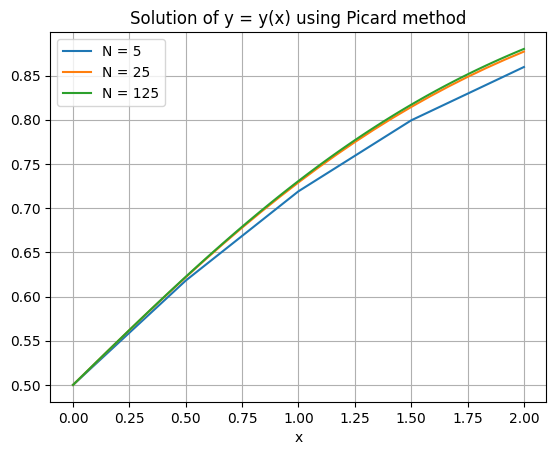

In [11]:
for i in range(len(N)):
    plt.plot(x[i], yp[i], label=f'N = {N[i]}')

plt.title("Solution of y = y(x) using Picard method")
plt.xlabel('x')
plt.grid()
plt.legend()

##### Finding $y = y(x)$ using Newton's method

$\frac{y(x+h) - y(x)}{h} = y(x+h)[1 - y(x+h)]$

$\frac{y_{i+1} - y_i}{h} = y_{i+1}[1 - y_{i+1}]$

$y_{i+1} = y_i + hy_{i+1}[1 - y_{i+1}]$

$f(y_{i+1}) = y_{i+1} - y_i - hy_{i+1}[1 - y_{i+1}] = hy_{i+1}^2 + (1 - h)y_{i+1} - y_i = 0$

$f'(y_{i+1}) = 2hy_{i+1} + 1 - h$

In [12]:
from modules.equations.single import newton_raphson

yn = [np.zeros(n) for n in N]

for i in range(len(N)):
    h = x[i][1] - x[i][0]    

    yn[i][0] = 0.5

    for j in range(1, N[i]):
        def f(y: float): return h*y*y + (1 - h)*y - yn[i][j-1]

        def df(y: float): return 2*h*y + 1 - h

        yn[i][j], _ = newton_raphson(f, df, yn[i][j-1], 1e9, tol, 100)

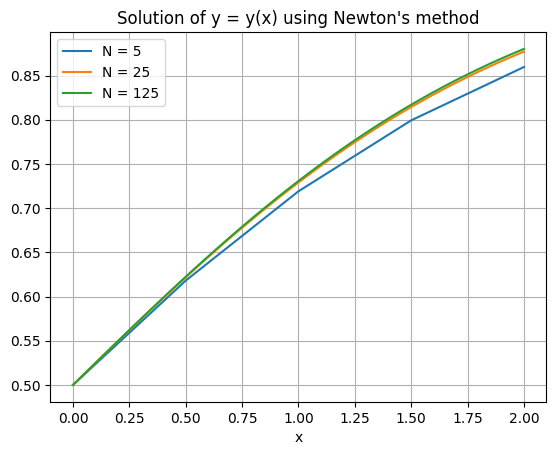

In [13]:
for i in range(len(N)):
    plt.plot(x[i], yn[i], label=f'N = {N[i]}')

plt.title("Solution of y = y(x) using Newton's method")
plt.xlabel('x')
plt.grid()
plt.legend()

##### Comparison of $y = y(x)$

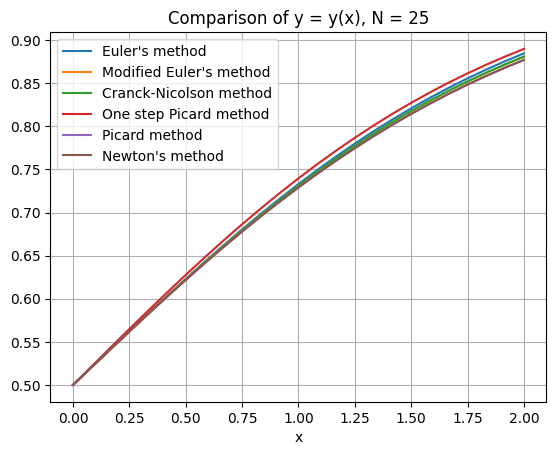

In [14]:
plt.plot(re[1][0], re[1][1][:, 0], label="Euler's method")
plt.plot(rme[1][0], rme[1][1][:, 0], label="Modified Euler's method")
plt.plot(x[1], ycn[1], label='Cranck-Nicolson method')
plt.plot(x[1], yp1[1], label='One step Picard method')
plt.plot(x[1], yp[1], label='Picard method')
plt.plot(x[1], yn[1], label="Newton's method")

plt.title(f"Comparison of y = y(x), N = {N[1]}")
plt.xlabel('x')
plt.grid()
plt.legend()

### Example #2

$y'' + 0.5(y^2 - 1) + y = 0, y(0) = 1, y'(0) = 0$

$y'' = -y - 0.5(y^2 - 1)$

$y' = z \Rightarrow \begin{bmatrix}
y' \\
z' \\
\end{bmatrix} = \begin{bmatrix}
z \\
-y - 0.5(y^2 - 1) \\
\end{bmatrix} \Rightarrow f(x, y, z) = \begin{bmatrix}
z \\
-y - 0.5(y^2 - 1) \\
\end{bmatrix}$ 

##### Finding $y = y(x)$ and $z = y'(x)$ using Euler's method

In [15]:
def f(x: float, y: np.ndarray[float]) -> np.ndarray[float]:
    fx = np.zeros(len(y))
    
    fx[0] = y[1]
    fx[1] = -y[0] - 0.5*(y[0]**2 - 1)

    return fx

a = 0.
b = 2.

ya = np.array([1., 0.])

re = [euler(f, a, b, ya, n) for n in N]

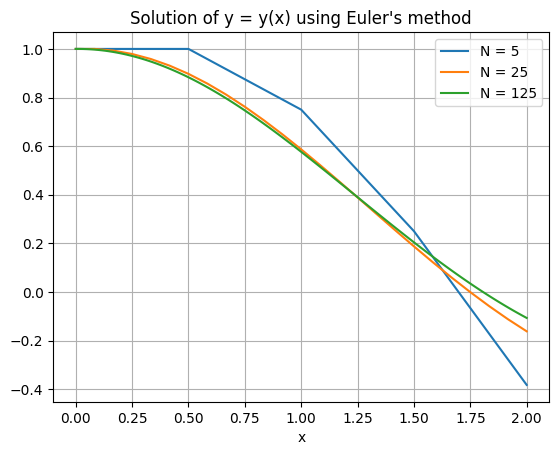

In [16]:
for i in range(len(N)):
    plt.plot(re[i][0], re[i][1][:, 0], label=f'N = {N[i]}')

plt.title("Solution of y = y(x) using Euler's method")
plt.xlabel('x')
plt.grid()
plt.legend()

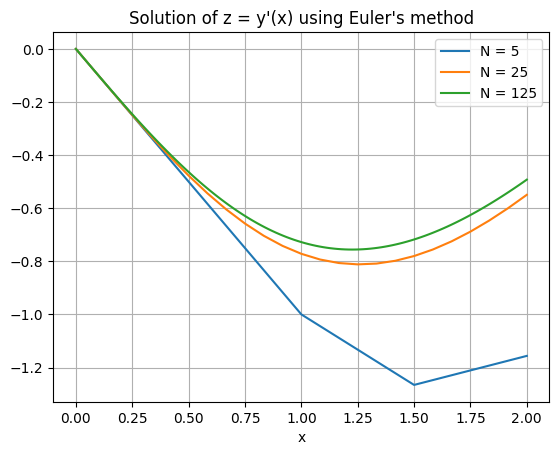

In [17]:
for i in range(len(N)):
    plt.plot(re[i][0], re[i][1][:, 1], label=f'N = {N[i]}')

plt.title("Solution of z = y'(x) using Euler's method")
plt.xlabel('x')
plt.grid()
plt.legend()

##### Finding $y = y(x)$ and $z = y'(x)$ using modified Euler's method

In [18]:
rme = [modified_euler(f, a, b, ya, n) for n in N]

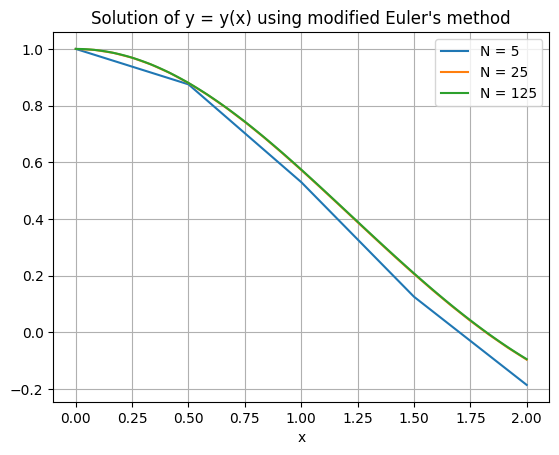

In [19]:
for i in range(len(N)):
    plt.plot(rme[i][0], rme[i][1][:, 0], label=f'N = {N[i]}')

plt.title("Solution of y = y(x) using modified Euler's method")
plt.xlabel('x')
plt.grid()
plt.legend()

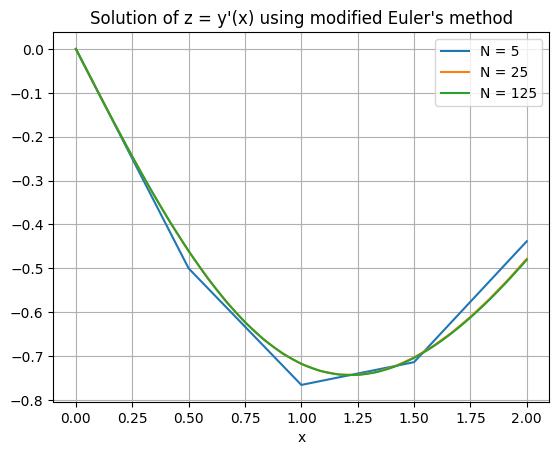

In [20]:
for i in range(len(N)):
    plt.plot(rme[i][0], rme[i][1][:, 1], label=f'N = {N[i]}')

plt.title("Solution of z = y'(x) using modified Euler's method")
plt.xlabel('x')
plt.grid()
plt.legend()

##### Finding $y = y(x)$ and $z = y'(x)$ using one step Picard method

$$y' = z \Rightarrow \frac{y(x+h) - y(x)}{h} = z(x+h)$$

$$z' = -y - 0.5(y^2 - 1) \Rightarrow \frac{z(x+h) - z(x)}{h} = -y(x+h) - 0.5(y^2(x+h) - 1)$$

$$y_{i+1} - y_i = hz_{i+1} \Rightarrow y_{i+1} - hz_{i+1} = y_i$$

$$z_{i+1} - z_i = h[-y_{i+1} - 0.5(y_{i+1}^2 - 1)] \Rightarrow z_{i+1} + h(1 + 0.5y_i)y_{i+1} = z_i + 0.5h$$

In [21]:
from modules.slae.solver.direct.gauss_elimination import gauss_elimination

m = len(ya)

x = [np.linspace(a, b, n) for n in N]
yp1 = [np.zeros((n, m)) for n in N]

for i in range(len(N)):
    h = x[i][1] - x[i][0]

    yp1[i][0] = ya

    for j in range(1, N[i]):
        a = np.array([
            [1, -h],
            [h*(1 + 0.5*yp1[i][j-1][0]), 1]
        ])

        b = [yp1[i][j-1][0], yp1[i][j-1][1] + 0.5*h]

        yp1[i][j] = gauss_elimination(a, b)

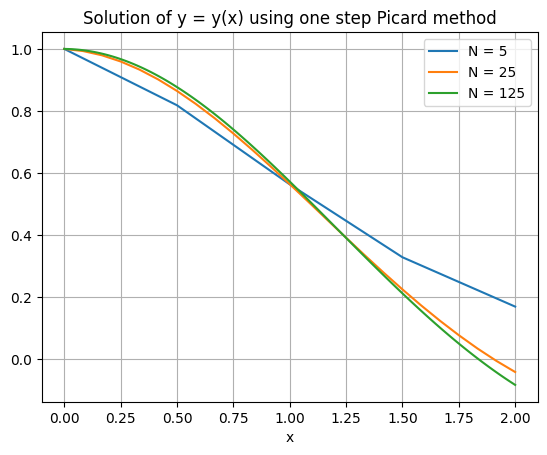

In [22]:
for i in range(len(N)):
    plt.plot(x[i], yp1[i][:, 0], label=f'N = {N[i]}')

plt.title("Solution of y = y(x) using one step Picard method")
plt.xlabel('x')
plt.grid()
plt.legend()

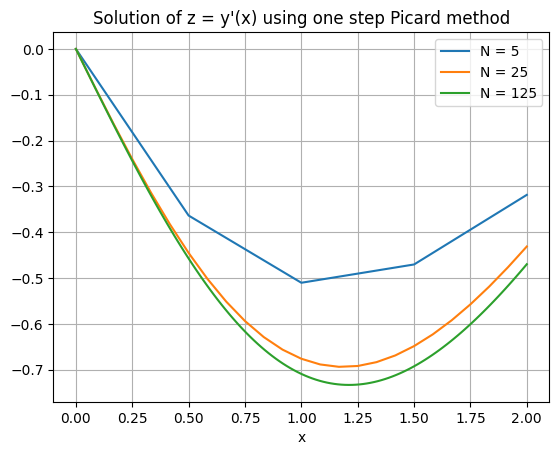

In [23]:
for i in range(len(N)):
    plt.plot(x[i], yp1[i][:, 1], label=f'N = {N[i]}')

plt.title("Solution of z = y'(x) using one step Picard method")
plt.xlabel('x')
plt.grid()
plt.legend()

##### Finding $y = y(x)$ and $z = y'(x)$ using Newton's method

$$y' = z \Rightarrow \frac{y(x+h) - y(x)}{h} = z(x+h)$$

$$z' = -y - 0.5(y^2 - 1) \Rightarrow \frac{z(x+h) - z(x)}{h} = -y(x+h) - 0.5(y^2(x+h) - 1)$$

$$y_{i+1} - y_i = hz_{i+1} \Rightarrow y_{i+1} - y_i - hz_{i+1} = 0$$

$$z_{i+1} - z_i = h[-y_{i+1} - 0.5(y_{i+1}^2 - 1)] \Rightarrow z_{i+1} - z_i + h[y_{i+1} + 0.5(y_{i+1}^2 - 1)] = 0$$

In [24]:
from modules.equations.system import newton_raphson_system

yn = [np.zeros((n, m)) for n in N]

for i in range(len(N)):
    h = x[i][1] - x[i][0]

    yn[i][0] = ya

    for j in range(1, N[i]):
        def f(y: np.ndarray[np.double]) -> np.ndarray[np.double]:
            fy = np.zeros(len(y))

            fy[0] = y[0] - yn[i][j-1][0] - h*y[1]
            fy[1] = y[1] - yn[i][j-1][1] + h*(y[0] + 0.5*(y[0]*y[0] - 1))

            return fy
        
        yn[i][j], iter = newton_raphson_system(f, yn[i][j-1].copy(), 1e-4, tol, 100)

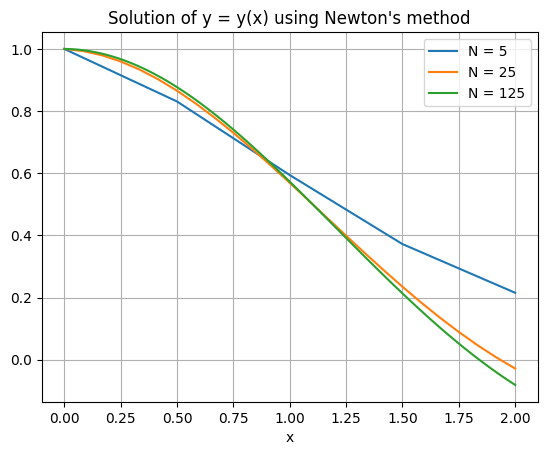

In [25]:
for i in range(len(N)):
    plt.plot(x[i], yn[i][:, 0], label=f'N = {N[i]}')

plt.title("Solution of y = y(x) using Newton's method")
plt.xlabel('x')
plt.grid()
plt.legend()

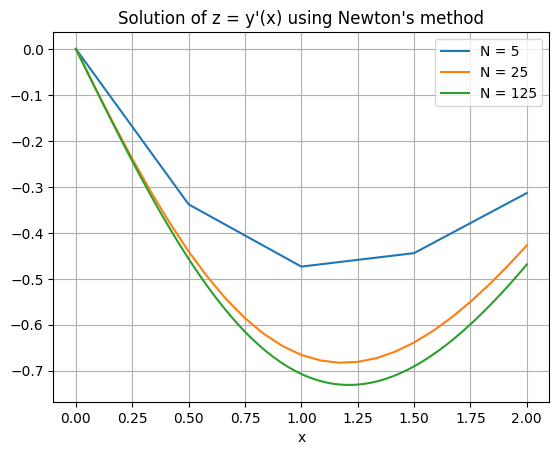

In [26]:
for i in range(len(N)):
    plt.plot(x[i], yn[i][:, 1], label=f'N = {N[i]}')

plt.title("Solution of z = y'(x) using Newton's method")
plt.xlabel('x')
plt.grid()
plt.legend()

##### Comparison of $y = y(x)$

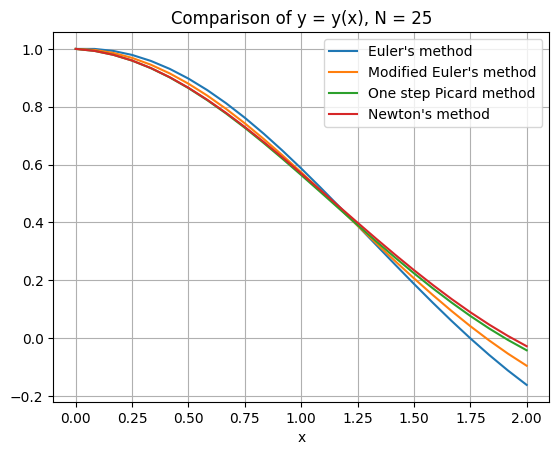

In [27]:
plt.plot(re[1][0], re[1][1][:, 0], label="Euler's method")
plt.plot(rme[1][0], rme[1][1][:, 0], label="Modified Euler's method")
plt.plot(x[1], yp1[1][:, 0], label="One step Picard method")
plt.plot(x[1], yn[1][:, 0], label="Newton's method")

plt.title(f"Comparison of y = y(x), N = {N[1]}")
plt.xlabel('x')
plt.grid()
plt.legend()

##### Сравнение $z = y'(x)$

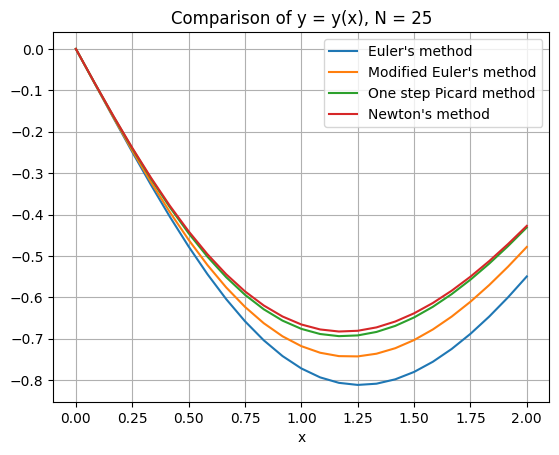

In [28]:
plt.plot(re[1][0], re[1][1][:, 1], label="Euler's method")
plt.plot(rme[1][0], rme[1][1][:, 1], label="Modified Euler's method")
plt.plot(x[1], yp1[1][:, 1], label="One step Picard method")
plt.plot(x[1], yn[1][:, 1], label="Newton's method")

plt.title(f"Comparison of y = y(x), N = {N[1]}")
plt.xlabel('x')
plt.grid()
plt.legend()